In [96]:
# General imports
import string
import numpy as np
import pandas as pd
import sklearn.feature_extraction as skprep
from sklearn.metrics import roc_curve, auc
from itertools import compress
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(20190124)
%matplotlib inline

# Keras imports
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, Reshape, MaxPooling1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten, Dense, Dropout, Lambda
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.metrics import categorical_crossentropy, categorical_accuracy
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image, sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocess
import pandas as pd
pd.set_option('display.max_colwidth',-1)

import seaborn as sns
import numpy as np
import string
import re
import warnings
import matplotlib.pyplot as plt
import os
import codecs
import unicodedata
warnings.filterwarnings('ignore')
from collections import Counter

import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


#file 
import pickle
import fileinput

#sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.utils.multiclass import unique_labels



In [2]:
# Extract the files.
df = pd.read_csv("Full_Data.csv",encoding='iso-8859-1')
display(df.head(150))
df.shape

,text,sentiment,confidence
0,trying to wait a patient as i can lol,1,0.3
1,"Good morning Fotopro Team, I noticed in some of the comments below you would be updating shipment details in June. It's June 8 now, is there an update on when we can expect orders?",1,0.6
2,these still on track? ahead? behind?,1,0.2
3,any update on delivery?,1,0.0
4,product so nice had to get it twice,1,0.5
...,...,...,...
145,"Me again, my package just arrived, thanks for this project!",1,0.7
146,"I'm part of the third batch that was just shipped. A previous comment mentioned Tracking info, would you happen to some for me? I know that it'll take a few extra days to arrive here in Germany, I'm just anxious to gift this to a friend of mine.",1,0.5
147,Thanks and best regards\r\nLeon,1,0.6
148,"It looks like when I originally tried to ship yours I had a shipping error. I just clicked refresh on it and it came back okay, so I'll be able to ship yours along with the remaining ~30 backers this Thursday.",0,0.6


(204058, 3)

## fastText Download
We Used fasttext for embeddings
First, download the fasttet model and apply it to our data so that each word is associated with the corresponding embedding vector

In [210]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.1.zip
!unzip v0.9.1.zip

--2019-12-11 15:16:27--  https://github.com/facebookresearch/fastText/archive/v0.9.1.zip
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/v0.9.1 [following]
--2019-12-11 15:16:28--  https://codeload.github.com/facebookresearch/fastText/zip/v0.9.1
Resolving codeload.github.com (codeload.github.com)... 192.30.253.121
Connecting to codeload.github.com (codeload.github.com)|192.30.253.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4327207 (4.1M) [application/zip]
Saving to: ‘v0.9.1.zip’

v0.9.1.zip          100%[===================>]   4.13M  8.68MB/s    in 0.5s    

2019-12-11 15:16:29 (8.68 MB/s) - ‘v0.9.1.zip’ saved [4327207/4327207]

Archive:  v0.9.1.zip
b5b7d307274ce00ef52198fbc692ed3bd11d9856
   creating: fastText-0.9.1/
   creating: fastText-0.9.1/.circleci/
  in

  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1Matrix.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1Matrix.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1Model-members.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1Model.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1Model.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1ProductQuantizer-members.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1ProductQuantizer.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1ProductQuantizer.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1QMatrix-members.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1QMatrix.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/classfasttext_1_1QMatrix.js

  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_11.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_11.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_12.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_12.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_13.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_13.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_14.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_14.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_15.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_15.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_16.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_16.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/all_17.html  
  inflating

  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_5.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_5.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_6.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_6.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_7.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_7.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_8.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_8.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_9.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_9.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_a.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/search/variables_a.js  
  inflating: fastText-0.9.1/

In [211]:
#Compile the library to sth. the computer can understand

%cd fastText-0.9.1

!make

/Users/Olivia/Documents/MDA/a3/fastText-0.9.1/fastText-0.9.1
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/vector.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/model.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/utils.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/meter.cc
c++ -pthr

Download the embedding vectors
fasttext is language dependent model, there are four levels of embeddings, since we're analyzing the sentimental analysis, so the forth one that trained using subword information from webcrawl of many websites was used.

In [212]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip
!gunzip -v -f crawl-300d-2M-subword.zip!gunzip -v -f crawl-300d-2M-subword.zip

--2019-12-11 15:16:52--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 2606:4700:10::6814:16a6, 2606:4700:10::6814:6a6, 104.20.22.166, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|2606:4700:10::6814:16a6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5828358084 (5.4G) [application/zip]
Saving to: ‘crawl-300d-2M-subword.zip’

crawl-300d-2M-subwo 100%[===================>]   5.43G  9.61MB/s    in 8m 16s  

2019-12-11 15:25:08 (11.2 MB/s) - ‘crawl-300d-2M-subword.zip’ saved [5828358084/5828358084]

gunzip: can't stat: crawl-300d-2M-subword.zip!gunzip (crawl-300d-2M-subword.zip!gunzip.gz): No such file or directory
gunzip: crawl-300d-2M-subword.zip: unknown suffix -- ignored


In [213]:
ls

CMakeLists.txt             loss.o
CODE_OF_CONDUCT.md         matrix.o
CONTRIBUTING.md            meter.o
LICENSE                    model.o
MANIFEST.in                productquantizer.o
Makefile                   python/
README.md                  quantization-example.sh*
alignment/                 quantmatrix.o
args.o                     runtests.py
classification-example.sh* scripts/
classification-results.sh* setup.cfg
crawl/                     setup.py
crawl-300d-2M-subword.zip  src/
densematrix.o              tests/
dictionary.o               utils.o
docs/                      vector.o
eval.py                    website/
fasttext*                  wikifil.pl
fasttext.o                 word-vector-example.sh*
get-wikimedia.sh*


Now, we can perform the preprocessing.
# Data Preprocessing
With the fasttext embedding model is downloaded, the data that comes from two crowdfunding platform can be preprocessed.
By looking at the dataset, we have many comments with positive sentiment =1 and negative sentiment = 0.

In [18]:
# Come back to the original work folder
%cd ..

/Users/Olivia/Documents/MDA/a3


Now, clean the text
Remove the special characters 
Keep the text in a clear format

In [3]:
#check number of words
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head(20)

,text,word_count
0,trying to wait a patient as i can lol,9
1,"Good morning Fotopro Team, I noticed in some of the comments below you would be updating shipment details in June. It's June 8 now, is there an update on when we can expect orders?",36
2,these still on track? ahead? behind?,6
3,any update on delivery?,4
4,product so nice had to get it twice,8
5,"Just curious... Will you have any extension goals for if you hit 200% of your goal, or if you hit $10,000?",21
6,"Got hands on this kit at the photoshow Birmingham England liked it so much have backed it, looking forward to delivery.",21
7,"looking forward to the many uses of this product. I am an educator who takes many films and pictures on mobile and other devices, so this should come in very handy for me.",33
8,"Hi! Looking forward to getting this product. What size tablet can the Mogo handle? Also, when I do basic videos, I usually use my cell phone for the audio. Is there a way to use the dampener (or, pop filter) along with holding the phone? I notice the thin wire that holds that filter is attached to the mic holder, but I would like some way to put the filter with the phone to cover the phone microphone.",79
9,Weâll post an update in the afternoon tomorrow! @clive,9


In [4]:
#check percentage of stopwords
stop = stopwords.words('english')

df['stopwords_percent'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))/df['word_count']
df[['text','stopwords_percent']].head(20)


,text,stopwords_percent
0,trying to wait a patient as i can lol,0.555556
1,"Good morning Fotopro Team, I noticed in some of the comments below you would be updating shipment details in June. It's June 8 now, is there an update on when we can expect orders?",0.416667
2,these still on track? ahead? behind?,0.333333
3,any update on delivery?,0.500000
4,product so nice had to get it twice,0.500000
5,"Just curious... Will you have any extension goals for if you hit 200% of your goal, or if you hit $10,000?",0.523810
6,"Got hands on this kit at the photoshow Birmingham England liked it so much have backed it, looking forward to delivery.",0.380952
7,"looking forward to the many uses of this product. I am an educator who takes many films and pictures on mobile and other devices, so this should come in very handy for me.",0.515152
8,"Hi! Looking forward to getting this product. What size tablet can the Mogo handle? Also, when I do basic videos, I usually use my cell phone for the audio. Is there a way to use the dampener (or, pop filter) along with holding the phone? I notice the thin wire that holds that filter is attached to the mic holder, but I would like some way to put the filter with the phone to cover the phone microphone.",0.367089
9,Weâll post an update in the afternoon tomorrow! @clive,0.333333


In [5]:
#check percentage of digits
df['numerics_percent'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))/df['word_count']
df[['text','numerics_percent']].head()
#very little digital number

,text,numerics_percent
0,trying to wait a patient as i can lol,0.000000
1,"Good morning Fotopro Team, I noticed in some of the comments below you would be updating shipment details in June. It's June 8 now, is there an update on when we can expect orders?",0.027778
2,these still on track? ahead? behind?,0.000000
3,any update on delivery?,0.000000
4,product so nice had to get it twice,0.000000


In [6]:
#check percentage of upper case
df['upper_percent'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))/df['word_count']
df[['text','upper_percent']].head()
#small percentage of upper case

,text,upper_percent
0,trying to wait a patient as i can lol,0.000000
1,"Good morning Fotopro Team, I noticed in some of the comments below you would be updating shipment details in June. It's June 8 now, is there an update on when we can expect orders?",0.027778
2,these still on track? ahead? behind?,0.000000
3,any update on delivery?,0.000000
4,product so nice had to get it twice,0.000000


In [12]:
df.drop_duplicates(keep=False)

,text,sentiment,confidence,word_count,stopwords_percent,numerics_percent,upper_percent
0,trying to wait a patient as i can lol,1,0.3,9,0.555556,0.000000,0.000000
1,"Good morning Fotopro Team, I noticed in some ...",1,0.6,36,0.416667,0.027778,0.027778
2,these still on track? ahead? behind?,1,0.2,6,0.333333,0.000000,0.000000
3,any update on delivery?,1,0.0,4,0.500000,0.000000,0.000000
4,product so nice had to get it twice,1,0.5,8,0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...
204053,I'm curious if you've looked at working with t...,1,0.7,41,0.317073,0.000000,0.024390
204054,Looking forward to another awesome campaign Ke...,1,1.7,15,0.200000,0.000000,0.000000
204055,Nice. Thanks for all answers! Cheers.,1,1.4,6,0.333333,0.000000,0.000000
204056,Wink was (and still) amazing. I was less enthu...,1,1.7,43,0.395349,0.000000,0.046512


## Remove punctuation and Double Space
punctuation including emoji

In [ ]:
# Text cleaning: remove punctuation and double space
import string

# Collect punctuation signs.
table = str.maketrans(' ', ' ', string.punctuation)

# Remove them from the text
#emoji also be deleted in this step
df.iloc[:,0] = [j.translate(table) for j in df.iloc[:,0]]
df.iloc[:,0] = [j.replace('\x96',' ') for j in df.iloc[:,0]]

# Eliminate double spaces
df.iloc[:,0] = [" ".join(j.split()) for j in df.iloc[:,0]]

# Show first 5
df[['text']].head()

## Stopwords Removal
“Stop words” are the most common words in a language like “the”, “a”, “on”, “is”, “all”. These words do not carry important meaning and are usually removed from texts. It is possible to remove stop words using Natural Language Toolkit (NLTK), a suite of libraries and programs for symbolic and statistical natural language processing.

In [7]:
#Remove stop words
# get stop_words
# remove stop words
stop_words = set(stopwords.words('english'))
stop_words.add("would")
def remove_stop_words(string):
    word_list = string.split()
    filterd_list = []
    for word in word_list:
        if word not in stop_words:
            filterd_list.append(word)
    new_string = ' '.join(filterd_list)
    return new_string

## Remove Contraction
Contractions are shortened version of words or syllables. They often exist in either written or spoken forms in the English language. These shortened versions or contractions of words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word. Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form helps with text standardization.


In [8]:
def replace_contraction(string):
    contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                        "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                        "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                        "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", 
                        "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
                        "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                        "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                        "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                        "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
                        "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", 
                        "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                        "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                        "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", 
                        "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", 
                        "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
                        "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                        "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", 
                        "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", 
                        "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", 
                        "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", 
                        "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", 
                        "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                        "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                        "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                        "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                        "y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", 
                        "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    word_list = string.split()
    for index,word in enumerate(word_list):
        if word in contraction_dict.keys():
            word_list[index] = contraction_dict[word]
    new_string = ' '.join(word_list)
    return new_string

## Clean Text
- numbers
- convert uppercase to lowercase:
    - This step allows a word to appear exactly the same every time it appears, so we can calculate word frequency accurately in the further analysis.
- remove all stopwords: no analytical value
- space
- contraction
- accented characters
    - Usually in any text corpus, you might be dealing with accented characters/letters, especially if you only want to analyze the English language. Hence, we need to make sure that these characters are converted and standardized into ASCII characters. A simple example — converting é to e.
- weblinks
    - Often, unstructured text contains a lot of noise, especially if you use techniques like web or screen scraping. HTML tags are typically one of these components which don’t add much value towards understanding and analyzing text.

In [9]:
# define a function to cleanup the text
def clean_text(x):
    # remove all space and newline
    text = x
    text = text.replace("\r\n","")
    # to lower case
    text = text.lower()
    #remove weblinks
    text = re.sub(r"http\S+", "", text)
    #remove contractions
    text = replace_contraction(text)
    # remove all numbers
    text = re.sub(r'\d+','',text)
    #remove punctuations
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, ' ', text)
    #remove stopwords
    text = remove_stop_words(text)
    #remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [10]:
df["Clean_text"] = df['text'].apply(clean_text)

In [11]:
df[['Clean_text']].head(100)

,Clean_text
0,trying wait patient lol
1,good morning fotopro team noticed comments updating shipment details june june update expect orders
2,still track ahead behind
3,update delivery
4,product nice get twice
...,...
95,strap looks really cheap mind much carabiners scratched bag holds going new strap made carabiners
96,got bag months ago first day using button inside broke pulling laptop seems really cheaply made responses company replacement messages literally first day received broke bag worth money looks like promotional bag could gotten free purchase cologne set department store
97,got shoulder strap pretty cheap expecting
98,business guys ever product ok really worth price service terrible


## Stemming
Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

To understand stemming, you need to gain some perspective on what word stems represent. Word stems are also known as the base form of a word, and we can create new words by attaching affixes to them in a process known as inflection. Consider the word JUMP. You can add affixes to it and form new words like JUMPS, JUMPED, and JUMPING. In this case, the base word JUMP is the word stem.

In [30]:
## I choose not to because many usual words will change to problematic words
## there are many errors in stemming: over stemming/under stemming like it change trying to tri, morning to morn
st = PorterStemmer()
df['Clean_text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


0                                 tri wait patient lol
1    good morn fotopro team notic comment updat shi...
2                             still track ahead behind
3                                       updat deliveri
4                               product nice get twice
Name: Clean_text, dtype: object

## Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word.

Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. However, the base form in this case is known as the root word, but not the root stem. The difference being that the root word is always a lexicographically correct word (present in the dictionary), but the root stem may not be so. Thus, root word, also known as the lemma, will always be present in the dictionary. Both nltk and spacy have excellent lemmatizers. We will be using spacy here.

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [13]:
df["Clean_text"] = df['Clean_text'].apply(lemmatize_sentence)

In [14]:
df.loc[142,'Clean_text']

'think ask postal zip code problem paypal directly payment customdstuff com leave note ordering'

In [15]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [16]:
df["Clean_text"] = df['Clean_text'].apply(deEmojify)

## Check if data is clean

In [119]:
#check number of words of clean text
df['word_count'] = df['Clean_text'].apply(lambda x: len(str(x).split(" ")))
df[['Clean_text','word_count']].head()

,Clean_text,word_count
0,try wait patient lol,4
1,good morning fotopro team notice comment updat...,14
2,still track ahead behind,4
3,update delivery,2
4,product nice get twice,4


In [ ]:
#check percentage of stopwords
stop = stopwords.words('english')

df['stopwords_percent'] = df['Clean_text'].apply(lambda x: len([x for x in x.split() if x in stop]))/df['word_count']
df[['Clean_text','stopwords_percent']].head()

In [ ]:
#check percentage of upper case of clean text
df['upper_percent'] = df['Clean_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))/df['word_count']
df[['Clean_text','upper_percent']].head()

In [ ]:
#Check percentage of special character

df['weblinks'] = df['Clean_text'].apply(lambda x: len([x for x in x.split() if re.findall(r'(https?://[^\s]+)', x)]))/df['word_count']
df[['Clean_text','weblinks']].head(30)

In [138]:
df[['text','Clean_text']].head(15)

,text,Clean_text
0,trying to wait a patient as i can lol,try wait patient lol
1,"Good morning Fotopro Team, I noticed in some of the comments below you would be updating shipment details in June. It's June 8 now, is there an update on when we can expect orders?",good morning fotopro team notice comment update shipment detail june june update expect order
2,these still on track? ahead? behind?,still track ahead behind
3,any update on delivery?,update delivery
4,product so nice had to get it twice,product nice get twice
5,"Just curious... Will you have any extension goals for if you hit 200% of your goal, or if you hit $10,000?",curious extension goal hit goal hit
6,"Got hands on this kit at the photoshow Birmingham England liked it so much have backed it, looking forward to delivery.",get hand kit photoshow birmingham england like much back look forward delivery
7,"looking forward to the many uses of this product. I am an educator who takes many films and pictures on mobile and other devices, so this should come in very handy for me.",look forward many us product educator take many film picture mobile device come handy
8,"Hi! Looking forward to getting this product. What size tablet can the Mogo handle? Also, when I do basic videos, I usually use my cell phone for the audio. Is there a way to use the dampener (or, pop filter) along with holding the phone? I notice the thin wire that holds that filter is attached to the mic holder, but I would like some way to put the filter with the phone to cover the phone microphone.",hi look forward get product size tablet mogo handle also basic video usually use cell phone audio way use dampener pop filter along hold phone notice thin wire hold filter attach mic holder like way put filter phone cover phone microphone
9,Weâll post an update in the afternoon tomorrow! @clive,post update afternoon tomorrow clive


## Estimate the embedding

When we have the embedding model, using it:

    - calculate the words that appear on the text and save to disk
    - use the fastText program to obtain the word embeddings
    - import the embeddings into a keras input layer
    - train the model

Start by selecting the inindividual words. Used the Keras internal model as Tokenizer, it will also add a dictionary to each word, which will be saved in the tokenizer model.

## Tokenization
Tokenization is the process of splitting the given text into smaller pieces called tokens. Words, numbers, punctuation marks, and others can be considered as tokens. In this table (“Tokenization” sheet) several tools for implementing tokenization are described.

In [17]:
tokenizer = Tokenizer() # Creates tokenizer model.
tokenizer.fit_on_texts(df.iloc[:,7]) # Trains it over the tokens that we have.

# Get words
Vals = list(tokenizer.word_index.keys())

# Write CSV with the output.
file = codecs.open('Token.csv', "w", "utf-8")

for item in Vals:
    file.write("%s\r\n" % item)
    
file.close()

In [18]:
!head Token.csv

Now, we have a csv file with all the words being used to comment in a standard format. 
It's ready to get the embeddings by calling the fasttext software from the command line.

In [24]:
!ls

A3 Deep Learning.ipynb   Embedding.tsv            Token.csv
A3.ipynb                 Embedding.tsv.bak        Untitled.ipynb
Coursework 3.pdf         Embeddings.csv           WordDictionary.pkl
Data_EmbeddingMatrix.txt Full_Data.csv            fastText-0.9.1
Data_Preprocessed        Full_Data.zip            v0.9.1.zip
Data_Preprocessed.zip    Slides                   wordDist.pdf


In [223]:
!unzip crawl-300d-2M-subword.zip

Archive:  crawl-300d-2M-subword.zip
replace crawl-300d-2M-subword.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [19]:
!./fastText-0.9.1/fasttext print-sentence-vectors fastText-0.9.1/crawl-300d-2M-subword.bin < Token.csv > Embedding.tsv

In [20]:
!head Embedding.tsv

-0.007181 -0.089073 0.19473 -0.016126 -0.044843 -0.094701 0.19616 -0.018465 -0.086646 0.12113 0.023217 0.019671 -0.016454 0.0065642 -0.030724 -0.041599 0.02576 0.016276 0.036183 0.059891 0.046455 -0.10075 -0.021495 -0.023996 0.08337 -0.039292 0.060459 0.0029318 -0.0058676 -0.013658 -0.0086531 -0.087365 0.030636 0.015001 0.026891 -0.0052913 0.055496 0.022995 0.0056023 0.020985 -0.011607 -0.085155 0.02051 0.041695 -0.0074898 0.10059 -0.019427 0.011985 -0.018916 0.019231 0.020266 -0.029564 0.0076768 0.048306 -0.1891 -0.0067369 -0.057447 -0.0068907 -0.2866 -0.022092 0.0020975 -0.077045 0.0039817 -0.008649 -0.012246 -0.007959 0.0044499 -0.20425 -0.0031668 -0.056271 -0.0068235 -0.053962 0.0012724 0.017395 0.025839 -0.015109 -0.022239 -0.010507 -0.030959 -0.009455 0.052147 0.0016768 -0.20783 0.020811 0.019109 -0.030324 0.0031172 0.026053 0.059512 -0.0064557 -0.021406 -0.0068667 -0.053342 0.098833 0.013572 0.24795 -0.005514 0.01564 0.070622 0.050324 -0.014125 0.053655 0.054952 0.015084 -0.0854

This is only for training, for testing we would:

- If we kept the embedding as is, we simply calculate the new embeddings for the new words and add it to our matrix.

- If we retrained the embeddings, then we would either use the output that we already have if the word was in our original vocabulary, or just leave a vector of zeros for those words if it is not.

fastText outputs space-separated words. We replace them with a comma.

In [21]:
with fileinput.FileInput('Embedding.tsv', inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(' ', ','), end='')

We add a first line with the variable names, to be able to import it back.

In [22]:
# Create the first line
firstLine = ','.join(['D'+str(i) for i in np.arange(1, 301)]) + '\n'

# Open as read only. Read the file
with open('Embedding.tsv', 'r') as original: 
  data = original.read()

# Open to write and write the first line and the rest
with open('Embeddings.csv', 'w') as modified: 
  modified.write(firstLine + data)

In [23]:
!head Embeddings.csv

D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,D46,D47,D48,D49,D50,D51,D52,D53,D54,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84,D85,D86,D87,D88,D89,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99,D100,D101,D102,D103,D104,D105,D106,D107,D108,D109,D110,D111,D112,D113,D114,D115,D116,D117,D118,D119,D120,D121,D122,D123,D124,D125,D126,D127,D128,D129,D130,D131,D132,D133,D134,D135,D136,D137,D138,D139,D140,D141,D142,D143,D144,D145,D146,D147,D148,D149,D150,D151,D152,D153,D154,D155,D156,D157,D158,D159,D160,D161,D162,D163,D164,D165,D166,D167,D168,D169,D170,D171,D172,D173,D174,D175,D176,D177,D178,D179,D180,D181,D182,D183,D184,D185,D186,D187,D188,D189,D190,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200,D201,D202,D203,D204,D205,D206,D207,D208,D209,D210,D211,D212,D213,D214,D215,D216,D217,D218,D219,D220,D221,D22

Just what we wanted! Now we have a matrix with every word in the document with its corresponding Embedding. We can now import this file into Python, and use it to train our model.

# Train a Neural Network with an Embedding Layer

The next step is to actually train a neural network with an Embedding Layer. For this, Keras has the aptly named "Embedding" layer, which will take care of our structures. The following code creates a very simple network that does the following:

1. Read the embeddings.
2. Calculate the One-Hot inputs (by using an "index") which will index which words are in which text.
3. Create a layer that associates the indexes with the embeddings.
4. Create the rest of the architecture.
5. Train the model.

In [24]:
# Read word embeddings
Embeddings = pd.read_csv('Embeddings.csv', sep=',', decimal = '.', 
                         low_memory = True, index_col = False)
Embeddings.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D291,D292,D293,D294,D295,D296,D297,D298,D299,D300
count,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,...,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000,71070.000000
mean,-0.020765,-0.021509,0.064025,0.008357,-0.006714,-0.076450,0.073332,0.001765,0.023798,-0.055219,...,0.025253,0.015675,-0.070396,-0.021143,0.022696,0.048191,0.060189,0.002826,-0.024859,0.000900
std,0.037031,0.072060,0.062862,0.047558,0.046676,0.059601,0.066815,0.040618,0.056161,0.073658,...,0.049046,0.043448,0.071374,0.044523,0.044374,0.071540,0.062852,0.041710,0.054193,0.042372
min,-0.246550,-0.454080,-0.244150,-0.222680,-0.220070,-0.341310,-0.202280,-0.212250,-0.259120,-0.416900,...,-0.206530,-0.204440,-0.347360,-0.239820,-0.181500,-0.335450,-0.318320,-0.187240,-0.266720,-0.187090
25%,-0.042155,-0.062586,0.022293,-0.021759,-0.037360,-0.111830,0.028951,-0.022649,-0.009873,-0.103940,...,-0.006148,-0.010834,-0.119180,-0.050061,-0.004862,0.000440,0.021516,-0.023480,-0.062090,-0.026065
50%,-0.018242,-0.014133,0.063571,0.010621,-0.006979,-0.068640,0.068463,0.000327,0.023335,-0.054774,...,0.026466,0.017718,-0.074953,-0.022099,0.024187,0.044271,0.056564,-0.000448,-0.026327,-0.002639
75%,0.002567,0.025079,0.105627,0.040438,0.023749,-0.036121,0.113450,0.024932,0.057896,-0.006330,...,0.057845,0.044139,-0.024730,0.006519,0.051752,0.092894,0.096816,0.026957,0.011495,0.025675
max,0.203890,0.339740,0.346000,0.227040,0.211800,0.216830,0.381950,0.213150,0.326950,0.312750,...,0.232840,0.237050,0.241170,0.204770,0.226270,0.410090,0.514970,0.229800,0.231850,0.229810


In [25]:
#Now create a dictionary for embedding.
# Create embedding dictionary

EmbeddingsDict = dict(zip(Vals, Embeddings.values))

After the embedding dictionary is created, we can study the texts to create the optimal embedding layer.
One of the decisions we need to make is what is going to be the maximum size of our documents. Too large, and we will need to add a lot of padding thus will make it inefficient; too small, and we will be losing a lot of information. There is no clear rule here, I usually try to cover 90% of all elements, but you can argue anything that makes sense to you.

In [26]:
df.iloc[:,7]

0         try wait patient lol                                                                                                                         
1         good morning fotopro team notice comment update shipment detail june june update expect order                                                
2         still track ahead behind                                                                                                                     
3         update delivery                                                                                                                              
4         product nice get twice                                                                                                                       
                   ...                                                                                                                                 
204053    curious look work particle photon processor module p module add cost directly 

Avg. no of words: 15.12
Std. deviation: 13.92
Max words: 629


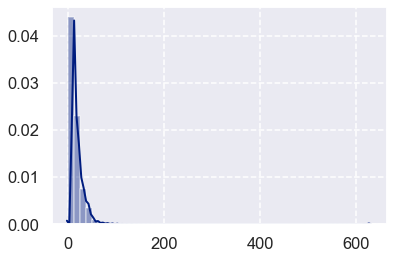

In [142]:
import seaborn as sns
import numpy as np
%matplotlib inline

# Count maximum number of words per file.
wordDist = [len(w.split()) for w in df.iloc[:,7]]
print('Avg. no of words: ' + str(np.round(np.mean(wordDist), 2)))
print('Std. deviation: ' + str(np.round(np.std(wordDist), 2)))
print('Max words: ' + str(np.max(wordDist)))

# Generate the plot
distData = sns.distplot(wordDist)

# I'm saving the image to a PDF, as it makes it easier later to download.
distData.figure.savefig("wordDist.pdf", format = "pdf")

Arbitrarily, we will use 170/70 words maximum. Try different values!

Now we create the input layer. The first layer will have the index of each word per-text, which then we will use to efficiently associate with the embedding. For this, we use Keras' "pad_sequence". This will either add padding to texts that are smaller than 170, or trim the ones that are longer. 

In [28]:
# Create word index from input
sequences = tokenizer.texts_to_sequences(df.iloc[:,7]) # Create the sequences.

# Creates the indexes. Word index is a dictionary with words in it.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Creates the training dataset, adding padding when necessary.
data = pad_sequences(sequences, maxlen=70, 
                     padding = 'post') # add padding at the end. No difference in practice.

# Creates the objective function
labels = df.iloc[:,1]
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 71070 unique tokens.
Shape of data tensor: (204058, 70)
Shape of label tensor: (204058,)


In [29]:
# Let's save the outputs, so we don't run all of the above 20 times.
# Be efficient! Save always save intermediate outputs

# Create saving directory
!mkdir Data_Preprocessed

# Save outputs
np.savetxt("Data_Preprocessed/Data_Padded.txt", data)
np.savetxt("Data_Preprocessed/Data_Labels.txt", labels)

mkdir: Data_Preprocessed: File exists


In [30]:
data[0]

array([ 61,  28, 765, 757,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype=int32)

As we can see above, our data now is a matrix corresponding to where on the embedding matrix is the vector we are looking for. This is an extremely efficient way of storing embeddings, but uses more CPU. That's ok though!

Now we are almost ready! Now we need to construct the Embedding matrix. This matrix will have the weights associated with each index. Keras will automatically construct the correct embedding of length 170 (see below).

In [31]:
# Create first matrix full with 0's
embedding_matrix = np.zeros((len(word_index) + 1, 300))

# Generate embeddings matrix
for word, i in word_index.items():
    embedding_vector = EmbeddingsDict.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Print what came out
embedding_matrix

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [-7.1810e-03, -8.9073e-02,  1.9473e-01, ..., -4.2866e-02,
        -2.9140e-02,  1.2571e-04],
       [ 1.4856e-02, -1.6472e-01,  1.4477e-01, ...,  5.6760e-02,
        -8.0176e-02, -1.2144e-02],
       ...,
       [-8.6826e-02,  3.4233e-02,  3.8068e-02, ...,  9.1966e-03,
         1.9971e-02,  4.4599e-02],
       [ 1.3113e-02, -1.2469e-01,  3.6819e-02, ...,  7.3507e-03,
        -7.8115e-04, -3.0591e-02],
       [ 2.0908e-03, -2.4629e-01,  9.9815e-02, ...,  8.3639e-03,
         1.3606e-02, -3.0303e-02]])

In [32]:
# Again, we save the intermediate result. If done right you only need this matrix!
# No need to run everything all over again.
np.savetxt("Data_EmbeddingMatrix.txt", embedding_matrix)

In [33]:
# We will also save the word dictionary
# A pickle file is a Python native file
import pickle
f = open("WordDictionary.pkl","wb")
pickle.dump(word_index, f)
f.close()

In [34]:
# Zip all files for download.
!zip -r Data_Preprocessed.zip Data_Preprocessed 

updating: Data_Preprocessed/ (stored 0%)
updating: Data_Preprocessed/Data_Padded.txt (deflated 97%)
updating: Data_Preprocessed/Data_Labels.txt (deflated 99%)


In [ ]:
# Download files

# Exploratory Analysis
To get a insight before we perform analysis of neural network, it is necessary to do an exploratory analysis of the distribution of the dataset.

## Basic Statistics

In [186]:
print("There are",df.shape[0],'samples in total.')
print("\nCounts on sentiment distribution:")
print(df.sentiment.value_counts())
print('\nBasic Statistic on Confidence:')
print(df.confidence.describe())

There are 204058 samples in total.

Counts on sentiment distribution:
1    144671
0    59387 
Name: sentiment, dtype: int64

Basic Statistic on Intensity:
count    204058.000000
mean     0.902525     
std      0.893052     
min      0.000000     
25%      0.300000     
50%      0.700000     
75%      1.300000     
max      22.299999    
Name: confidence, dtype: float64


## Most Frequent Word

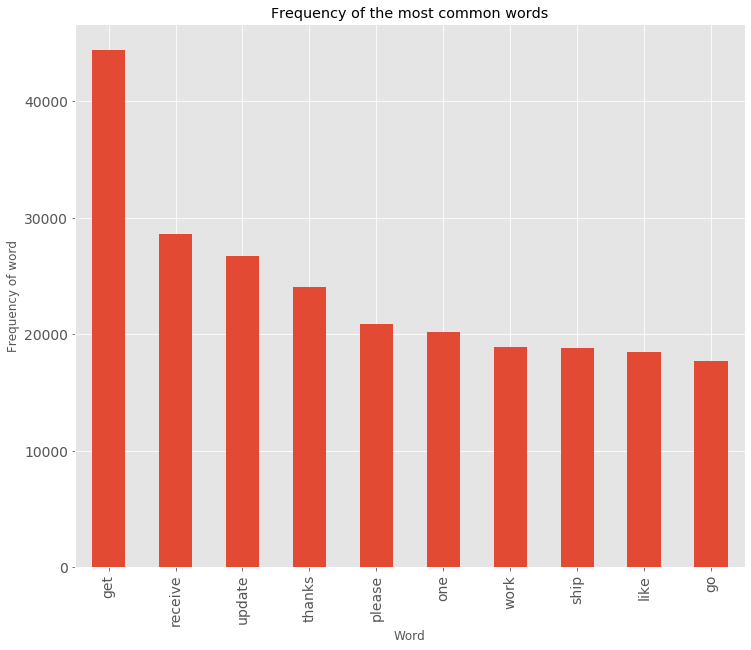

In [311]:
Counter(" ".join(df["Clean_text"]).split()).most_common(10)
fig = plt.figure(figsize=(16, 9))   
ax = r['Frequency'].plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

In [312]:
def split(x):
    text = x
    # split into list of words
    text = text.split()
    return text

In [313]:
df["split"] = df['Clean_text'].apply(split)

In [314]:
# helper function to count freqency of words
def count_freq(series):
    cnt = Counter()
    for doc in series:
        for word in doc:
            cnt[word]+=1
    return cnt

In [318]:
# get top 10 frequent words for each lebels
a = count_freq(df[pos_sen_index].split).most_common(15)
b = count_freq(df[neg_sen_index].split).most_common(15)
pos_freq = [[i for i,j in a],[j for i,j in a]]
neg_freq = [[i for i,j in b],[j for i,j in b]]
df_freq_pos = pd.DataFrame({'Positive Word':pos_freq[0],'P_Count':pos_freq[1],'Negative Word':neg_freq[0],'N_Count':neg_freq[1]})
df_freq_pos.head(15)

,Positive Word,P_Count,Negative Word,N_Count
0,get,29423,get,14994
1,thanks,22332,receive,13366
2,update,18167,update,8554
3,receive,15197,still,8309
4,thank,13929,please,7666
5,hi,13771,email,6844
6,one,13658,send,6726
7,ship,13336,refund,6631
8,please,13238,one,6504
9,work,13193,order,6337


## Word Count Distribution

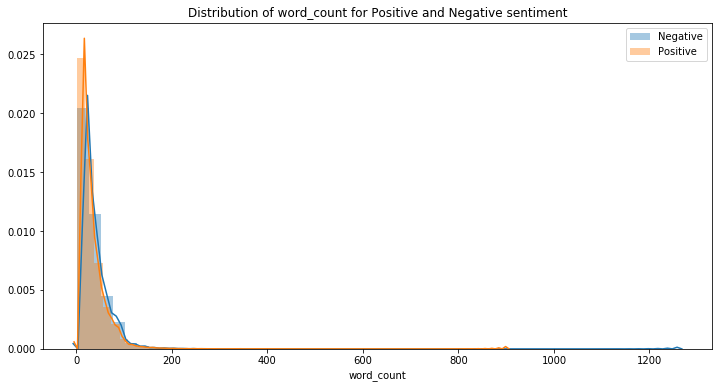

In [188]:
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(df[neg_sen_index].word_count,ax = ax,label = 'Negative')
sns.distplot(df[pos_sen_index].word_count,ax = ax,label= 'Positive')
plt.title("Distribution of word_count for Positive and Negative sentiment")
ax.legend()
plt.show()

The distributin is not very different.

## Phrase Length Distribution

In [321]:
from plotly.offline import init_notebook_mode, iplot

In [326]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Proportion of Target Variable

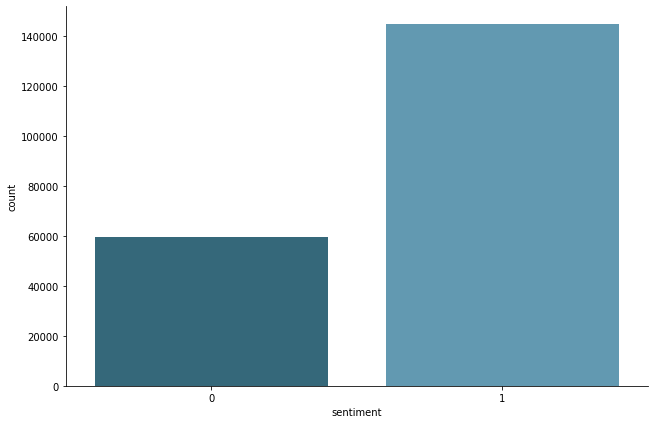

In [167]:
sns.factorplot(x="sentiment", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

It can be shown in the chart that the class labels were unbalanced, there were more positive comments than negative comments.

 ## Average Word Account of Each Class

In [142]:
df['word_count'] = df['Clean_text'].apply(lambda x: len(str(x).split(" ")))
df[['Clean_text','word_count']]

,Clean_text,word_count
0,try wait patient lol,4
1,good morning fotopro team notice comment update shipment detail june june update expect order,14
2,still track ahead behind,4
3,update delivery,2
4,product nice get twice,4
...,...,...
204053,curious look work particle photon processor module p module add cost directly via high power need wifi enable make awesome starter iot device,23
204054,look forward another awesome campaign kevin good job plum geek crew,11
204055,nice thanks answer cheer,4
204056,wink still amaze less enthusiast plumduino way run wink project make plum geek makerfan back one continue learn enjoin way make thing,22


In [143]:
neg_sen_index = df.sentiment == 0
pos_sen_index = df.sentiment == 1
neg_avg = df[neg_sen_index].word_count.mean()
pos_avg = df[pos_sen_index].word_count.mean()
avg_df = pd.DataFrame({'Sentiment':['Positive','Negative'],'Average Word Count':[pos_avg,neg_avg]})
avg_df.head()


,Sentiment,Average Word Count
0,Positive,14.634834
1,Negative,16.303669


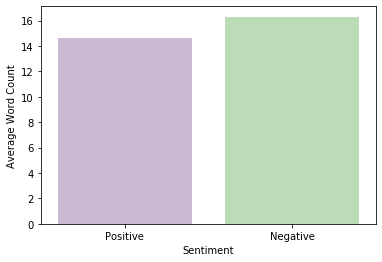

In [168]:
sns.barplot('Sentiment','Average Word Count',data = avg_df,palette='PRGn')

The negative comment have more words on average, but the difference is not that big.

## Average Confidence Score for Sentiments

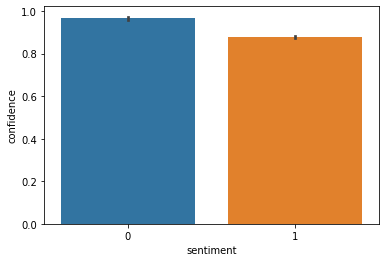

In [178]:
sns.barplot(x='sentiment', y='confidence' , data=df)

The confidence score is higher for negative sentence than positive comments.

## Modelling using an embedding layer

We will also generate a train and test set to make a fair comparison between our models. From here onwards we will use the train_test_split function from scikit-learn. This works for any general dataset, not only scorecards.

In [210]:
#Split the data into train and test.  
#Hold out 40% of observations as the test set. 
#Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, 
                                                    random_state=20190327, 
                                                    stratify = labels)

Two architectures:
    1. A simple convnet using a sequence of layers
    2. More complex model


Now that we have this ready, we need to create our model and add an [Embedding Layer](https://keras.io/layers/embeddings/). We'll create a very simple model using Convolutional Layers as hidden layers.

In [215]:
# Final model.
model = Sequential()
embedding_layer = Embedding(len(embedding_matrix),           # Words in the embedding.
                            300,                           # Embedding dimension
                            weights=[embedding_matrix],    # The weights we just calculated
                            input_length=70,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

model.add(embedding_layer)

## Sequential ConvNet
I started with a simple architecture first:


1. A 1D convolution of size 3 (so three word sequences)
2. A second 1D convolution of size 3 (so more complex word sequences)
3. Dropout to avoid overfitting
4. Max pooling to get the most important sequences.
5. A flattening layer.
6. A dense layer of 128 neurons.
7. Dropout with p = 0.5
8. A softmax output.

Very important: If you are letting your embedding to adapt to your own model, you need to set "trainable=True", if not, leave to False.

Done! We have a model that uses an embedding layer as input. Let's try it in a (very bad) model.Our network will take the embedding as input and will estimate the probability of being of class 1 or 0 (positive or negative). A potential architecture is as follows:

- A [1D-Convolutional Layer](https://keras.io/layers/convolutional/): See the next lecture for details :). I will add 64 filters and a kernel size of 3, which means "look for 64 different combinations of 3 words that are useful". We use ReLU activation for it.

- A [Flatten](https://keras.io/layers/core/#flatten) layer: The embedding matrix comes as a, well, a matrix, the output of the first layer will be as well. We need to change this to a shallow 1D tensor. The Flatten layer takes matrices (or N-Dimensional tensors) and turns them into 1D tensors.

- A Dense layer with 64 neurons and ReLU activation.

- A [Dropout](https://keras.io/layers/core/#dropout) layer: Big models can have many millions of parameters. These models are prone to be overfitted. [Srivastava et al. (2014)](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf) realized that a simple way to avoid overadjustment was to simply randomly set a large number of parameters to 0. This is called "Dropout". We will randomly set 40% of all weights to 0. This is a tunable parameter, you should experiment with parameters that make sense to you.


In [222]:
# Final model.
model = Sequential()
embedding_layer = Embedding(len(embedding_matrix),           # Words in the embedding.
                            300,                           # Embedding dimension
                            weights=[embedding_matrix],    # The weights we just calculated
                            input_length=70,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

model.add(embedding_layer)

# Check for 64 sequences of length 3.
#Add first convolution, the operation is to add a Convolution1D layer, called Conv1D.
model.add(Conv1D(filters=32,           # How many filters to calculate.
                 kernel_size=3,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1)             # What stride to use?
         )
#Add second convolutional layer
model.add(Conv1D(filters=64,           # How many filters to calculate.
                 kernel_size=3,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1)             # What stride to use?
         )


#And now we add max pooling. We will reduce filters by a factor of 3, to keep with the number. 
#Basically, we will only choose one out of every three sequences that we are studying, the most intense one.
model.add(MaxPooling1D(pool_size = 3))

#Almost done, First we flatten, and then add a dense layer. Dropout and an output layer finalize the problem.
# Flatten
# Turn output matrices into 1D tensor for shallow network.
model.add(Flatten())

# Dense Layer of size 128 with Dropout:  Add 128 neurons with ReLU activation.
model.add(Dense(64, activation = 'relu'))
#Add droout
model.add(Dropout(0.2))


#Add an output layer with a sigmoid.
# Output layer of size 1
model.add(Dense(1, activation = 'sigmoid'))

#we need a binary_crossentropy error function. I will use Adam for training.
# Use Adam as optimizer, with a binary_crossentropy error.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])


In [223]:
#check the summary of the network
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 70, 300)           21321300  
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 68, 32)            28832     
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 66, 64)            6208      
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 22, 64)            0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 1408)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                90176     
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)              

Train on 99988 samples, validate on 42852 samples
Epoch 1/20
99988/99988 [==============================] - 65s 650us/sample - loss: 0.4012 - acc: 0.8110 - val_loss: 0.3707 - val_acc: 0.8306
Epoch 2/20
99988/99988 [==============================] - 61s 611us/sample - loss: 0.3609 - acc: 0.8337 - val_loss: 0.3647 - val_acc: 0.8338
Epoch 3/20
99988/99988 [==============================] - 61s 606us/sample - loss: 0.3437 - acc: 0.8429 - val_loss: 0.3664 - val_acc: 0.8342
Epoch 4/20
99988/99988 [==============================] - 61s 611us/sample - loss: 0.3286 - acc: 0.8510 - val_loss: 0.3641 - val_acc: 0.8354
Epoch 5/20
99988/99988 [==============================] - 80s 796us/sample - loss: 0.3127 - acc: 0.8592 - val_loss: 0.3854 - val_acc: 0.8223
Epoch 6/20
99988/99988 [==============================] - 61s 610us/sample - loss: 0.2973 - acc: 0.8653 - val_loss: 0.3813 - val_acc: 0.8256


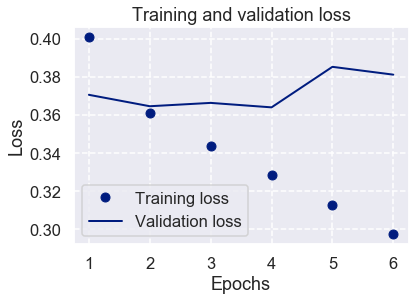

In [224]:
#Now we train. We will use 33% of the data as a test set, and train for 10 epochs.
#We will calculate the model over the training set, 
#and then estimate the AUC of the model over both the training and testing set.
# Fit the model
callbacks_list=[keras.callbacks.EarlyStopping(monitor='val_loss',patience=2),keras.callbacks.ModelCheckpoint(filepath='fasttext_seq_model.h5',monitor='val_loss',save_best_only=True)]
history = model.fit(X_train, y_train, validation_split=0.3, epochs=20, batch_size=20,callbacks=callbacks_list)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#It stops at Epoch 4, but we set a checkpoint at Epoch 2 that has the lowest validation loss.
#Because our patience is set to 2, so if it's greater than the smallest validation loss two times, 
#then it will stop.

In [ ]:
#The model reaches high predictive capability very quickly in the train set
#but the validation set overfit quite quickly too! (around 2 epochs)

We should have probably stopped training at around 2 epochs or so. It's possible to do this automatically, I added a [callback](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/). You must either do it manually or automatically, but you **must** do it.

We can now calculate the ROC curve of the model with the following code.

# Measure the Performance
- Calculate Accuracy
- AUROC
- Confusion Matrix over thet test set for each of models
- Generate a plot with all the ROC curve

Not a bad model at all! This model can actually be improved much further, by carefully designing an architecture that exploits the structure of the words and the complexity of the dataset.

Let's finally plot the ROC curve over the test set.

In [219]:
# Calculate outputs in test set
model.load_weights("fasttext_seq_model.h5")
prob_test = model.predict(X_test, verbose = 1)
prob_train = model.predict(X_train, verbose = 1)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

142840/142840 [==============================] - 27s 192us/sample

AUC train:  0.9090099340768073
AUC test:  0.8970981607408457


In [225]:
#Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    ax.axis('equal')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax

Confusion matrix, without normalization
Model Acuracy is 0.83
Model Recall is 0.89


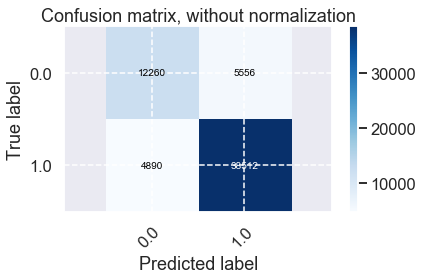

In [226]:
ypreds = model.predict_classes(X_test)


plot_confusion_matrix(y_test, ypreds, classes = np.array([0.0,1.0]));
cm = confusion_matrix(y_test, ypreds)

# Sum of diagonal entries divided by total sum
model_accuracy = np.diag(cm).sum()/cm.sum()

# Bottom right divided by sum of second column
model_precision = cm[1,1]/np.sum(cm[:,1])

# Bottom right divided by sum of second row
model_recall = cm[1,1]/np.sum(cm[1,:])

print(f"Model Acuracy is {model_accuracy:.2f}")
print(f"Model Recall is {model_recall:.2f}")

# Fasttext embedding with 2nd architecture
## Parallel layers
1. An embedding layer as beofre
2. A paralle model of four layers each consisting of:



In [107]:
# Parallel model
# Filter sizes to use.
filter_sizes = (2,3,5,8)

# Initialize. We need to give it the input dimension (from the Embedding!)
graph_in = Input(shape=(70, 300)) #70 and 300 dimensions
convs = []
avgs = []

# This for stacks the layers. Inside each for, we build the sequence of layer. The command "append" adds
# that to the "conv" variable, which is simply a stack of convolutions.
for fsz in filter_sizes:
    conv = Conv1D(filters=128,
                  kernel_size=fsz,
                         padding='valid',
                         activation='relu',
                         strides=1)(graph_in) # Note the (graph_in). This means "put this layer AFTER the graph_in layer.
    pool = MaxPooling1D(pool_size=70 - fsz + 1)(conv) # Put this layer AFTER the convolution just created.
    flattenMax = Flatten()(pool) # Flatten the pooling layer.
    convs.append(flattenMax) # Append this to the convs object that saves the stack.
    
# Concatenate layers.
if len(filter_sizes)>1:
    out = Concatenate()(convs)
else:
    out = convs[0]

graph = Model(inputs=graph_in, outputs=out, name="graphModel")

graph.summary()

Model: "graphModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 70, 300)]    0                                            
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, 69, 128)      76928       input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_24 (Conv1D)              (None, 68, 128)      115328      input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 66, 128)      192128      input_2[0][0]                    
_________________________________________________________________________________________

In [104]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline

plot_model(graph, show_shapes=True, show_layer_names=True, to_file='GraphModel.png')
Image(retina=True, filename='GraphModel.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'GraphModel.png'

Note that we named the model "graphModel", and that it follows the architecture we discussed. This is just the "middle" part of the network, so we need to add an input layer, and an output layer.

We can do this with a traditional sequential model.

In [109]:
# Final model
model2 = Sequential()
embedding_layer = Embedding(len(embedding_matrix),           # Words in the embedding.
                            300,                           # Embedding dimension
                            weights=[embedding_matrix],    # The weights we just calculated
                            input_length=70,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

model2.add(embedding_layer)

# Now we add our graph model
model2.add(graph)

# Add a few layers
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

# adam = Adam(clipnorm=.1)
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 70, 300)           21321300  
_________________________________________________________________
graphModel (Model)           (None, 512)               691712    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 22,078,805
Trainable params: 757,505
Non-trainable params: 21,321,300
_________________________________________________________________


In [110]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline

plot_model(model2, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'model.png'

Train on 91601 samples, validate on 45117 samples
Epoch 1/20
91601/91601 [==============================] - 404s 4ms/sample - loss: 0.3895 - acc: 0.8196 - val_loss: 0.3587 - val_acc: 0.8349
Epoch 2/20
91601/91601 [==============================] - 374s 4ms/sample - loss: 0.3395 - acc: 0.8463 - val_loss: 0.3571 - val_acc: 0.8368
Epoch 3/20
91601/91601 [==============================] - 333s 4ms/sample - loss: 0.2904 - acc: 0.8704 - val_loss: 0.3825 - val_acc: 0.8219
Epoch 4/20
91601/91601 [==============================] - 319s 3ms/sample - loss: 0.2198 - acc: 0.9068 - val_loss: 0.4525 - val_acc: 0.8178


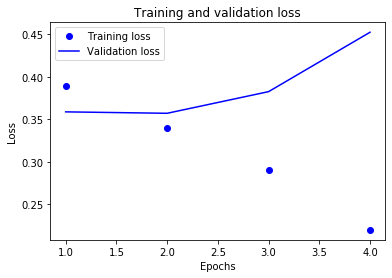

In [112]:
#Train model
#We will use 33% of the data as a test set, and train for 10 epochs.
#We will calculate the model over the training set, 
#and then estimate the AUC of the model over both the training and testing set.
# Fit the model
callbacks_list=[keras.callbacks.EarlyStopping(monitor='val_loss',patience=2),keras.callbacks.ModelCheckpoint(filepath='fasttext_model2.h5',monitor='val_loss',save_best_only=True)]
history = model2.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=20,callbacks=callbacks_list)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


136718/136718 [==============================] - 144s 1ms/sample

AUC train:  0.9301936891965065
AUC test:  0.9030750586473937


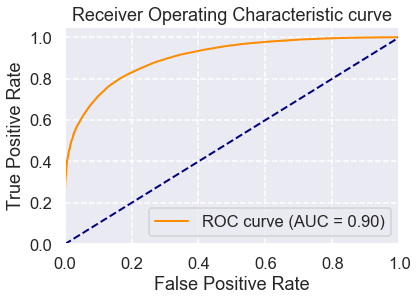

In [128]:
# Calculate outputs in test set
model2.load_weights("fasttext_model2.h5")
prob_test = model2.predict(X_test, verbose = 1)
prob_train = model2.predict(X_train, verbose = 1)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.savefig('roc_auc.pdf', format = "pdf")
plt.show()

Confusion matrix, without normalization
Model2 Acuracy is 0.84
Model2 Recall is 0.91


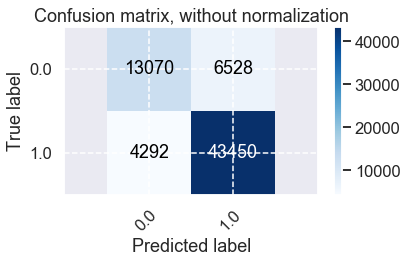

In [129]:
#Confusion matrix
ypreds = model2.predict_classes(X_test)

plot_confusion_matrix(y_test, ypreds, classes = np.array([0.0,1.0]));
cm = confusion_matrix(y_test, ypreds)

# Sum of diagonal entries divided by total sum
model2_accuracy = np.diag(cm).sum()/cm.sum()

# Bottom right divided by sum of second column
model2_precision = cm[1,1]/np.sum(cm[:,1])

# Bottom right divided by sum of second row
model2_recall = cm[1,1]/np.sum(cm[1,:])

print(f"Model2 Acuracy is {model2_accuracy:.2f}")
print(f"Model2 Recall is {model2_recall:.2f}")

# Embedding Using Glove
Now, I will use GloVe as embeddings,. It's a popular embedding technique based on factorizing a matrix of word co-occurence statistics.
We will use a dimensional of 100 GloVe embeddings of 400K words computed from English Wikipedia.

## Approach
1. Convert all text into sequence of word indices, which stands for an integer ID for the word. Only the most commonly occuring words would be considered in the dataset, and their will be truncated to a maximum of 1000 words.
2. A embedding matrix that stores the ebedding vector for each word at index i.
3. Then this embedding matrix can be loaded into a Keras embedding layer, its weights, the embedding vecotrs will not be updatd while training.
4. Build on top of it a 1D convolutional neural network, end in a softmax outpuv over categories. 

## Create an embedding layer from GloVe
Computer an index mapping words to known embeding, by parsing the data dump of pre-trained embeddings.


In [117]:
!wget 'http://nlp.stanford.edu/data/glove.6B.zip'
!unzip glove.6B.zip

--2019-12-12 19:20:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-12-12 19:20:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-12-12 19:20:01--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [122]:
embeddings_index = {}
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [123]:
#At this point we can leverage our embedding_index dictionary and our word_index to compute our embedding matrix:
glove_embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        glove_embedding_matrix[i] = embedding_vector

In [125]:
#We load this embedding matrix into an Embedding layer. 
#Note that we set trainable=False to prevent the weights from being updated during training.
embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[glove_embedding_matrix],
                            input_length=70,
                            trainable=False)

An Embedding layer should be fed sequences of integers, i.e. a 2D input of shape (samples, indices). These input sequences should be padded so that they all have the same length in a batch of input data (although an Embedding layer is capable of processing sequence of heterogenous length, if you don't pass an explicit input_length argument to the layer).

All that the Embedding layer does is to map the integer inputs to the vectors found at the corresponding index in the embedding matrix, i.e. the sequence [1, 2] would be converted to [embeddings[1], embeddings[2]]. This means that the output of the Embedding layer will be a 3D tensor of shape (samples, sequence_length, embedding_dim).

In [132]:
# Final model
glove_model = Sequential()

glove_model.add(embedding_layer)


# Check for 64 sequences of length 3.
#Add first convolution, the operation is to add a Convolution1D layer, called Conv1D.
glove_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=3,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1)             # What stride to use?
         )
#Add second convolutional layer
glove_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=3,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1)             # What stride to use?
         )


#And now we add max pooling. We will reduce filters by a factor of 3, to keep with the number. 
#Basically, we will only choose one out of every three sequences that we are studying, the most intense one.
glove_model.add(MaxPooling1D(pool_size = 3))

#Almost done, First we flatten, and then add a dense layer. Dropout and an output layer finalize the problem.
# Flatten
# Turn output matrices into 1D tensor for shallow network.
glove_model.add(Flatten())

# Dense Layer of size 128 with Dropout:  Add 128 neurons with ReLU activation.
glove_model.add(Dense(128, activation = 'relu'))
#Add droout
glove_model.add(Dropout(0.5))


#Add an output layer with a sigmoid.
# Output layer of size 1
glove_model.add(Dense(1, activation = 'sigmoid'))

#we need a binary_crossentropy error function. I will use Adam for training.
# Use Adam as optimizer, with a binary_crossentropy error.
glove_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
glove_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 70, 300)           21321300  
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 68, 128)           115328    
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 66, 128)           49280     
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 22, 128)           0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 2816)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               360576    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)             

Train on 91601 samples, validate on 45117 samples
Epoch 1/20
91601/91601 [==============================] - 117s 1ms/sample - loss: 0.4208 - acc: 0.8020 - val_loss: 0.3897 - val_acc: 0.8170
Epoch 2/20
91601/91601 [==============================] - 129s 1ms/sample - loss: 0.3739 - acc: 0.8286 - val_loss: 0.3954 - val_acc: 0.8150
Epoch 3/20
91601/91601 [==============================] - 110s 1ms/sample - loss: 0.3413 - acc: 0.8456 - val_loss: 0.3926 - val_acc: 0.8231


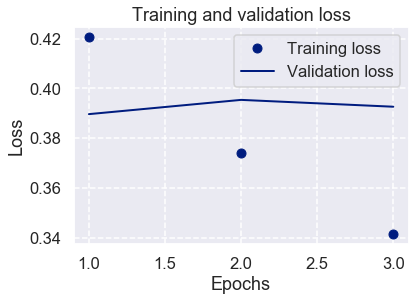

In [133]:
#Now we train. We will use 33% of the data as a test set, and train for 10 epochs.
#We will calculate the model over the training set, 
#and then estimate the AUC of the model over both the training and testing set.
# Fit the model
callbacks_list=[keras.callbacks.EarlyStopping(monitor='val_loss',patience=2),keras.callbacks.ModelCheckpoint(filepath='golve_seq_model.h5',monitor='val_loss',save_best_only=True)]
history = glove_model.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=20,callbacks=callbacks_list)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

136718/136718 [==============================] - 53s 391us/sample

AUC train:  0.8927714790600321
AUC test:  0.8828415971893422


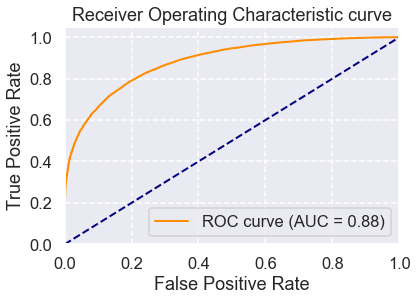

In [134]:
# Calculate outputs in test set
glove_model.load_weights("golve_seq_model.h5")
prob_test = glove_model.predict(X_test, verbose = 1)
prob_train = glove_model.predict(X_train, verbose = 1)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.savefig('roc_auc.pdf', format = "pdf")
plt.show()

Confusion matrix, without normalization
Glove Model Acuracy is 0.82
Glove Model Recall is 0.92


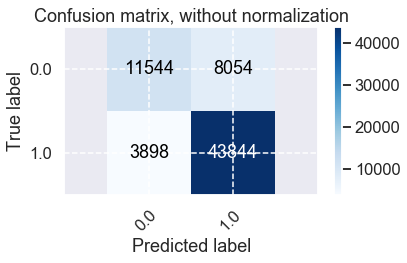

In [135]:
#Confusion matrix
ypreds = glove_model.predict_classes(X_test)

plot_confusion_matrix(y_test, ypreds, classes = np.array([0.0,1.0]));
cm = confusion_matrix(y_test, ypreds)

# Sum of diagonal entries divided by total sum
glove_model_accuracy = np.diag(cm).sum()/cm.sum()

# Bottom right divided by sum of second column
glove_model_precision = cm[1,1]/np.sum(cm[:,1])

# Bottom right divided by sum of second row
glove_model_recall = cm[1,1]/np.sum(cm[1,:])

print(f"Glove Model Acuracy is {glove_model_accuracy:.2f}")
print(f"Glove Model Recall is {glove_model_recall:.2f}")

## Parallel Model

In [136]:
# Parallel model
# Filter sizes to use.
filter_sizes = (2,3,5,8)

# Initialize. We need to give it the input dimension (from the Embedding!)
graph_in = Input(shape=(70, 300)) #70 and 300 dimensions
convs = []
avgs = []

# This for stacks the layers. Inside each for, we build the sequence of layer. The command "append" adds
# that to the "conv" variable, which is simply a stack of convolutions.
for fsz in filter_sizes:
    conv = Conv1D(filters=128,
                  kernel_size=fsz,
                         padding='valid',
                         activation='relu',
                         strides=1)(graph_in) # Note the (graph_in). This means "put this layer AFTER the graph_in layer.
    pool = MaxPooling1D(pool_size=70 - fsz + 1)(conv) # Put this layer AFTER the convolution just created.
    flattenMax = Flatten()(pool) # Flatten the pooling layer.
    convs.append(flattenMax) # Append this to the convs object that saves the stack.
    
# Concatenate layers.
if len(filter_sizes)>1:
    out = Concatenate()(convs)
else:
    out = convs[0]

graph = Model(inputs=graph_in, outputs=out, name="graphModel")

graph.summary()

Model: "graphModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 70, 300)]    0                                            
__________________________________________________________________________________________________
conv1d_35 (Conv1D)              (None, 69, 128)      76928       input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_36 (Conv1D)              (None, 68, 128)      115328      input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_37 (Conv1D)              (None, 66, 128)      192128      input_3[0][0]                    
_________________________________________________________________________________________

In [137]:
# Final model
glove_model2 = Sequential()
embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[glove_embedding_matrix],
                            input_length=70,
                            trainable=False)

glove_model2.add(embedding_layer)

# Now we add our graph model
glove_model2.add(graph)

# Add a few layers
glove_model2.add(Dense(128, activation='relu'))
glove_model2.add(Dropout(0.5))
glove_model2.add(Dense(1, activation='sigmoid'))

# adam = Adam(clipnorm=.1)
glove_model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
glove_model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 70, 300)           21321300  
_________________________________________________________________
graphModel (Model)           (None, 512)               691712    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 129       
Total params: 22,078,805
Trainable params: 757,505
Non-trainable params: 21,321,300
_________________________________________________________________


Train on 91601 samples, validate on 45117 samples
Epoch 1/20
91601/91601 [==============================] - 330s 4ms/sample - loss: 0.4218 - acc: 0.8011 - val_loss: 0.3851 - val_acc: 0.8212
Epoch 2/20
91601/91601 [==============================] - 335s 4ms/sample - loss: 0.3631 - acc: 0.8355 - val_loss: 0.3834 - val_acc: 0.8202
Epoch 3/20
91601/91601 [==============================] - 336s 4ms/sample - loss: 0.3014 - acc: 0.8651 - val_loss: 0.4474 - val_acc: 0.8205
Epoch 4/20
91601/91601 [==============================] - 333s 4ms/sample - loss: 0.2244 - acc: 0.9033 - val_loss: 0.4785 - val_acc: 0.8163


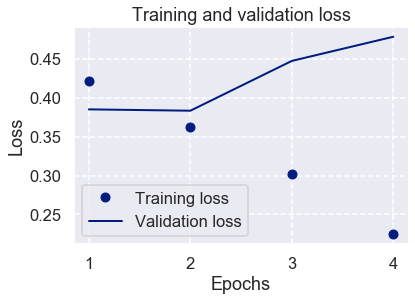

In [138]:
#Train model
#We will use 33% of the data as a test set, and train for 10 epochs.
#We will calculate the model over the training set, 
#and then estimate the AUC of the model over both the training and testing set.
# Fit the model
callbacks_list=[keras.callbacks.EarlyStopping(monitor='val_loss',patience=2),keras.callbacks.ModelCheckpoint(filepath='glove_model2.h5',monitor='val_loss',save_best_only=True)]
history = glove_model2.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=20,callbacks=callbacks_list)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



136718/136718 [==============================] - 156s 1ms/sample

AUC train:  0.9257203549215255
AUC test:  0.8872720745251089


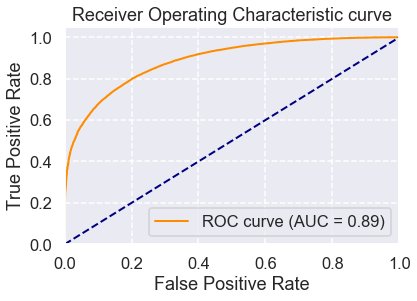

In [139]:
# Calculate outputs in test set
glove_model2.load_weights("glove_model2.h5")
prob_test = glove_model2.predict(X_test, verbose = 1)
prob_train = glove_model2.predict(X_train, verbose = 1)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.savefig('roc_auc.pdf', format = "pdf")
plt.show()

Confusion matrix, without normalization
Glove Model2 Acuracy is 0.82
Glove Model2 Recall is 0.93


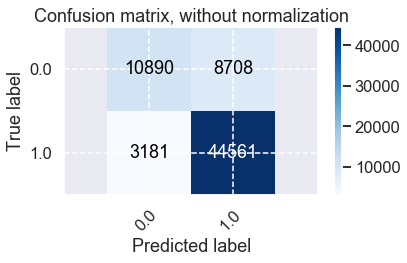

In [141]:
#Confusion matrix
ypreds = glove_model2.predict_classes(X_test)

plot_confusion_matrix(y_test, ypreds, classes = np.array([0.0,1.0]));
cm = confusion_matrix(y_test, ypreds)

# Sum of diagonal entries divided by total sum
glove_model2_accuracy = np.diag(cm).sum()/cm.sum()

# Bottom right divided by sum of second column
glove_model2_precision = cm[1,1]/np.sum(cm[:,1])

# Bottom right divided by sum of second row
glove_model2_recall = cm[1,1]/np.sum(cm[1,:])

print(f"Glove Model2 Acuracy is {glove_model2_accuracy:.2f}")
print(f"Glove Model2 Recall is {glove_model2_recall:.2f}")